In [1]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import RegressorChain

from mlspecies import ConstructModel

Calculate predictions of Ar atom partition function Z<sub>int</sub> with simple Linear Regression.

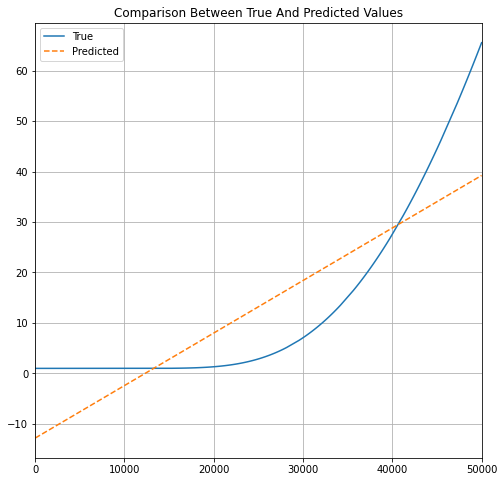

Test set RMSE: 9.531


In [5]:
name = "Ar"
property_name = "Z_int"
temperature = np.arange(1, 50001).reshape(-1, 1)
estimator = LinearRegression()

model = ConstructModel(
    name=name,
    property_name=property_name,
    temperature_data=temperature,
    estimator=estimator,
)

X_train, X_test, y_train, y_test = model.split_data()
model.train_model(X_train, y_train)
y_pred = model.make_predictions(X_test)
model.plot_results(X_test, y_pred)
model.compute_score(y_test, y_pred)

Let's try fit some estimators which can detect nonlinearity. Start with Random Forest Regressor on Ar atom specific internal energy E<sub>int</sub>.

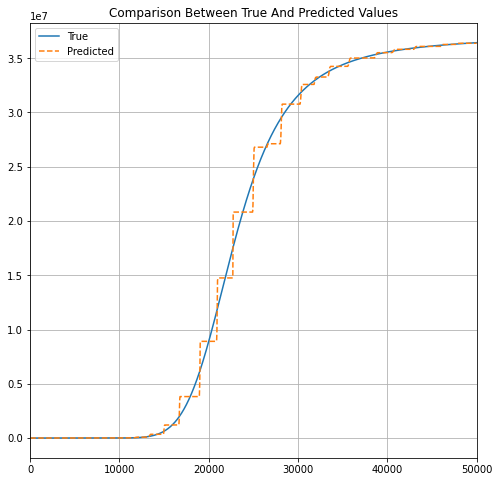

Test set RMSE: 739199.888


In [5]:
name = "Ar"
property_name = "E_int"
temperature = np.arange(1, 50001).reshape(-1, 1)
estimator = RandomForestRegressor(min_samples_leaf=0.02, random_state=2)

model = ConstructModel(
    name=name,
    property_name=property_name,
    temperature_data=temperature,
    estimator=estimator,
)

X_train, X_test, y_train, y_test = model.split_data()
model.train_model(X_train, y_train)
y_pred = model.make_predictions(X_test)
model.plot_results(X_test, y_pred)
model.compute_score(y_test, y_pred)

And Gradient Boosting Regressor on Ar atom specific heat capacity c<sub>V</sub>.

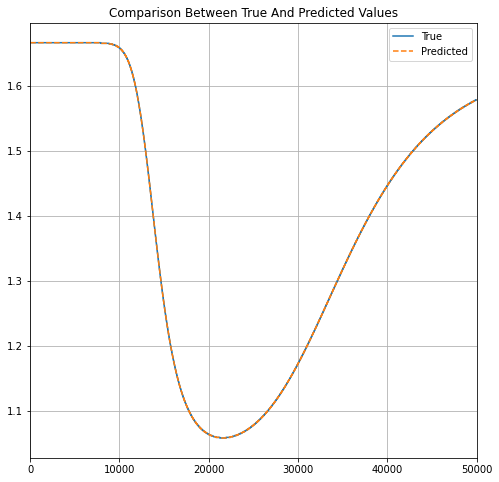

Test set RMSE: 0.000


In [24]:
name = "Ar"
property_name = "kappa"
temperature = np.arange(1, 50001).reshape(-1, 1)
estimator = GradientBoostingRegressor(max_depth=10, random_state=2)

model = ConstructModel(
    name=name,
    property_name=property_name,
    temperature_data=temperature,
    estimator=estimator,
)

X_train, X_test, y_train, y_test = model.split_data()
model.train_model(X_train, y_train)
y_pred = model.make_predictions(X_test)
model.plot_results(X_test, y_pred)
model.compute_score(y_test, y_pred)

We can use these estimators in multi-output regression problems via Regressor Chain, such as predicting the equilibrium composition of air mixture (5-component).

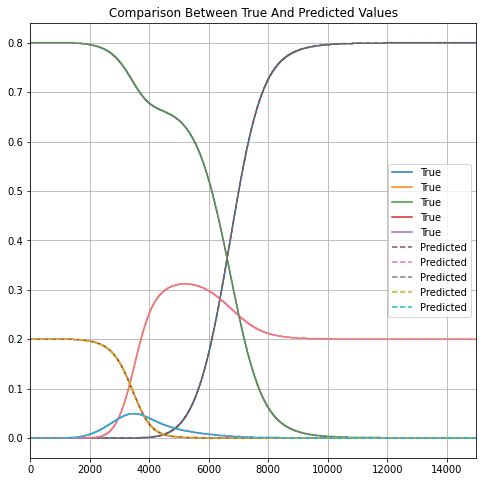

Test set RMSE: 0.000


In [3]:
name = "Air5"
property_name = "EqComp"
temperature = np.linspace(50, 15000, 30000).reshape(-1, 1)
estimator = RegressorChain(GradientBoostingRegressor(max_depth=10, random_state=2))

model = ConstructModel(
    name=name,
    property_name=property_name,
    temperature_data=temperature,
    estimator=estimator,
)

X_train, X_test, y_train, y_test = model.split_data()
model.train_model(X_train, y_train)
y_pred = model.make_predictions(X_test)
model.plot_results(X_test, y_pred)
model.compute_score(y_test, y_pred)

And we can also add some minor noise to original data to show that estimator still understands the trend.

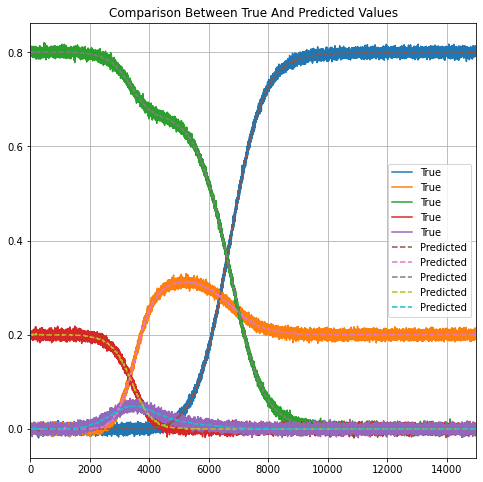

Test set RMSE: 0.005


In [2]:
name = "Air5"
property_name = "EqComp"
temperature = np.linspace(50, 15000, 30000).reshape(-1, 1)
estimator = RegressorChain(GradientBoostingRegressor(max_depth=5, random_state=2))

model = ConstructModel(
    name=name,
    property_name=property_name,
    temperature_data=temperature,
    estimator=estimator,
    noise=True,
)

X_train, X_test, y_train, y_test = model.split_data()
model.train_model(X_train, y_train)
y_pred = model.make_predictions(X_test)
model.plot_results(X_test, y_pred)
model.compute_score(y_test, y_pred)